#### 자연어 처리
- 수집
- 정제 및 토큰화
- 불용어 / 구두점 제거
- 단어사전 => 토큰 : 숫자 맵핑 진햐
- 데이터의 수치화

- [1] 모듈 로딩 밎 테이터 로딩

In [1]:
from nltk.tokenize import word_tokenize,sent_tokenize,wordpunct_tokenize

In [2]:
#데이터 준비
TEXT_FILE='../data/corpus_data.txt'

In [3]:
# 파일에서 데이터 추출 => 'rt' : defalt value
with open(TEXT_FILE,mode='rt',encoding="utf-8") as f:
    # 읽을 데이터 사이즈 만큼 지정
    text_data100=f.read(100)
    text_data=f.read()

In [4]:
len(text_data100),len(text_data)

(100, 41953)

In [5]:
# 파일에서 데이터 추출 => 'rt' : defalt value
# 라인단위로 읽기 => readline()
with open(TEXT_FILE,mode='rt',encoding="utf-8") as f:
    all_data=[]
    while True:
        # 한 줄씩('\n')읽기
        text_data=f.readline()
        if not text_data:break
        else:all_data.append(text_data)

In [6]:
len(all_data)

149

In [7]:
# 파일에서 데이터 추출 => 'rt' : defalt value
# 라인단위로 전체 읽기 => readlines()
with open(TEXT_FILE,mode='rt',encoding="utf-8") as f:
    # 한 줄씩('\n') 전체 읽어서 리스트에[ 담아서 반환]
    text_data=f.readlines()

In [8]:
len(text_data)

149

- [2] 데이터 전처리

- 줄바꿈 문자 처리

In [9]:
all_text=[]
for text in text_data:
    text=text.replace('\n','')
    if len(text):all_text.append(text)
len(all_text)

87

- 대소문자 통일

In [10]:
all_text=(text.lower() for text in all_text)    #(a for a in b)generator      [a for a in b]리스트 컴프리핸션

In [11]:
# 추출법
#for _ in all_text:print(_)

- 토큰화

In [12]:
all_tokens=[]
for text in all_text:
    all_tokens.append(wordpunct_tokenize(text))

In [13]:
print(f'{len(all_tokens)}개')

87개


- 불용어 & 구두점 제거

In [14]:
## 불용어 추출
from nltk.corpus import stopwords
import string
eng_sw=stopwords.words('english')
pun=list(string.punctuation)

In [15]:
# 불용어, 구두점, 길이 짧은 토큰 삭제
for tokenList in all_tokens:
    for token in tokenList[::-1]:
        if (token in eng_sw)or(token in pun)or(len(token)<=2):
            tokenList.remove(token)


In [16]:
for tokenList in all_tokens:
    print(tokenList)

['tichborne', 'claimant', 'redirects', '1998', 'film', 'see', 'tichborne', 'claimant', 'film']
['blended', 'image', 'centre', 'said', 'claimant', 'supporters', 'prove', 'roger', 'tichborne', 'left', '1853', 'claimant', 'right', '1874', 'one', 'person']
['tichborne', 'case', 'legal', 'cause', 'célèbre', 'fascinated', 'victorian', 'britain', '1860s', '1870s', 'concerned', 'claims', 'man', 'sometimes', 'referred', 'thomas', 'castro', 'arthur', 'orton', 'usually', 'termed', 'claimant', 'missing', 'heir', 'tichborne', 'baronetcy', 'failed', 'convince', 'courts', 'convicted', 'perjury', 'served', 'year', 'prison', 'sentence']
['roger', 'tichborne', 'heir', 'family', 'title', 'fortunes', 'presumed', 'died', 'shipwreck', '1854', 'age', 'mother', 'clung', 'belief', 'might', 'survived', 'hearing', 'rumours', 'made', 'way', 'australia', 'advertised', 'extensively', 'australian', 'newspapers', 'offering', 'reward', 'information', '1866', 'wagga', 'wagga', 'butcher', 'known', 'thomas', 'castro', 'c

- 단어별 빈도수 계산

In [17]:
# 토큰을 키로 해서 빈도수 저장
token_freqs={}
# 라인(줄)별 토큰을 읽어서 빈도 체크
for tokenList in all_tokens:
    for token in tokenList:
        # 토큰키가 존제하지 않으면 키로 추가후 1로 설정
        if token not in token_freqs:
            token_freqs[token]=1
        else:
            # 이미 존제하는 토큰 키이면 값을 1증가
            token_freqs[token]+=1

In [18]:
token_freqs

{'tichborne': 97,
 'claimant': 115,
 'redirects': 1,
 '1998': 3,
 'film': 4,
 'see': 1,
 'blended': 1,
 'image': 1,
 'centre': 2,
 'said': 5,
 'supporters': 8,
 'prove': 2,
 'roger': 62,
 'left': 6,
 '1853': 6,
 'right': 2,
 '1874': 6,
 'one': 13,
 'person': 2,
 'case': 23,
 'legal': 12,
 'cause': 3,
 'célèbre': 1,
 'fascinated': 1,
 'victorian': 1,
 'britain': 1,
 '1860s': 1,
 '1870s': 1,
 'concerned': 2,
 'claims': 2,
 'man': 4,
 'sometimes': 4,
 'referred': 1,
 'thomas': 8,
 'castro': 15,
 'arthur': 22,
 'orton': 41,
 'usually': 1,
 'termed': 1,
 'missing': 5,
 'heir': 4,
 'baronetcy': 4,
 'failed': 5,
 'convince': 3,
 'courts': 4,
 'convicted': 3,
 'perjury': 5,
 'served': 3,
 'year': 5,
 'prison': 3,
 'sentence': 4,
 'family': 32,
 'title': 3,
 'fortunes': 2,
 'presumed': 3,
 'died': 9,
 'shipwreck': 2,
 '1854': 5,
 'age': 2,
 'mother': 6,
 'clung': 1,
 'belief': 3,
 'might': 6,
 'survived': 1,
 'hearing': 3,
 'rumours': 2,
 'made': 7,
 'way': 1,
 'australia': 13,
 'advertised': 1

In [19]:
### 빈도별로 몇 개의 단어가 존제하는지 체크
token_freqs.items()

dict_items([('tichborne', 97), ('claimant', 115), ('redirects', 1), ('1998', 3), ('film', 4), ('see', 1), ('blended', 1), ('image', 1), ('centre', 2), ('said', 5), ('supporters', 8), ('prove', 2), ('roger', 62), ('left', 6), ('1853', 6), ('right', 2), ('1874', 6), ('one', 13), ('person', 2), ('case', 23), ('legal', 12), ('cause', 3), ('célèbre', 1), ('fascinated', 1), ('victorian', 1), ('britain', 1), ('1860s', 1), ('1870s', 1), ('concerned', 2), ('claims', 2), ('man', 4), ('sometimes', 4), ('referred', 1), ('thomas', 8), ('castro', 15), ('arthur', 22), ('orton', 41), ('usually', 1), ('termed', 1), ('missing', 5), ('heir', 4), ('baronetcy', 4), ('failed', 5), ('convince', 3), ('courts', 4), ('convicted', 3), ('perjury', 5), ('served', 3), ('year', 5), ('prison', 3), ('sentence', 4), ('family', 32), ('title', 3), ('fortunes', 2), ('presumed', 3), ('died', 9), ('shipwreck', 2), ('1854', 5), ('age', 2), ('mother', 6), ('clung', 1), ('belief', 3), ('might', 6), ('survived', 1), ('hearing',

In [20]:
# 빈도수별로 단어 또는 단어개수저장
freqsDict={}
for k,v in token_freqs.items():
    if v not in freqsDict:
        freqsDict[v]=[1,[k]]
    else:
        freqsDict[v][1].append(k)
        freqsDict[v][0]+=1
print(freqsDict)

{97: [1, ['tichborne']], 115: [1, ['claimant']], 1: [1119, ['redirects', 'see', 'blended', 'image', 'célèbre', 'fascinated', 'victorian', 'britain', '1860s', '1870s', 'referred', 'usually', 'termed', 'clung', 'survived', 'way', 'advertised', 'extensively', 'forward', 'claiming', 'manners', 'unrefined', 'gathered', 'instantly', 'dismissive', 'protracted', 'emerged', 'suggesting', 'charged', 'gain', 'passing', 'condemned', 'instigated', 'reform', 'championed', 'elected', 'independent', 'effective', 'parliamentarian', 'decline', 'dealings', 'recant', 'poverty', 'view', 'analysts', 'believe', 'element', 'conceivably', 'norman', 'conquest', 'reformation', '16th', 'century', 'number', 'hanged', 'drawn', 'quartered', 'complicity', 'babington', 'plot', 'assassinate', 'elizabeth', 'loyal', '1621', 'benjamin', 'services', 'king', 'tree', 'simplified', 'extinct', '1968', '14th', 'seventh', 'travelling', 'verdun', 'peace', 'amiens', 'broke', '1803', 'reigniting', 'napoleonic', 'wars', 'enemy', 'ci

In [21]:
sorted(freqsDict.items(),reverse=True)

[(115, [1, ['claimant']]),
 (97, [1, ['tichborne']]),
 (62, [1, ['roger']]),
 (41, [1, ['orton']]),
 (32, [1, ['family']]),
 (23, [2, ['case', 'sir']]),
 (22, [2, ['arthur', 'kenealy']]),
 (19, [1, ['lady']]),
 (18, [3, ['son', 'court', 'years']]),
 (16, [1, ['trial']]),
 (15, [1, ['castro']]),
 (14, [3, ['wagga', 'although', 'name']]),
 (13, [6, ['one', 'australia', 'england', 'may', 'doughty', 'would']]),
 (12, [2, ['legal', 'evidence']]),
 (11,
  [8,
   ['information',
    'london',
    'edward',
    'james',
    'henry',
    'former',
    '".[',
    'witnesses']]),
 (10, [5, ['support', 'accepted', 'civil', 'bogle', 'cockburn']]),
 (9, [4, ['died', 'john', 'ship', 'including']]),
 (8,
  [12,
   ['supporters',
    'thomas',
    'details',
    'wapping',
    'identity',
    'became',
    'later',
    'two',
    'first',
    'could',
    'ballantine',
    'hawkins']]),
 (7,
  [21,
   ['made',
    'butcher',
    '1871',
    'park',
    'remained',
    'daughter',
    'much',
    'kathe

- [3] 단어집합/단어사전 생성
* 단어 : 숫자 맵핑
* 나의 데이터셋을 숫자로 변환하기 위한 인코딩표
* 문장 => 수치화 진행 시 길이를 동일하게 맞추는 작업 즉, 패딩
    - 패딩에 사용되는 토큰'PAD"키, 값은0
* 테스트 또는 검증에 입력되는 텍스트 ==> 단어사전/집합에 존제하지 않는 단어
    - 존제하지 않는 토큰'OOV'또는 'UNK'키,값1

In [22]:
## 빈도가 높게 나오는 순서대로 단어 정렬
storedTokens=sorted(token_freqs.items(),key=lambda x: x[1],reverse=True)

In [23]:
## 단어사전 생성 및 초기화
## 특수토큰 : 'PAD', 'OOV' Ehsms 'UNK'
PAD_TOKEN,OOV_TOKEN='PAD','OOV'
vocab={PAD_TOKEN:0,OOV_TOKEN:1}

In [24]:
## 데이터 코퍼스에서 추출된 토큰(단어)들
for idx,tk in enumerate(storedTokens,2):
    vocab[tk[0]]=idx
print(vocab)

{'PAD': 0, 'OOV': 1, 'claimant': 2, 'tichborne': 3, 'roger': 4, 'orton': 5, 'family': 6, 'case': 7, 'sir': 8, 'arthur': 9, 'kenealy': 10, 'lady': 11, 'son': 12, 'court': 13, 'years': 14, 'trial': 15, 'castro': 16, 'wagga': 17, 'although': 18, 'name': 19, 'one': 20, 'australia': 21, 'england': 22, 'may': 23, 'doughty': 24, 'would': 25, 'legal': 26, 'evidence': 27, 'information': 28, 'london': 29, 'edward': 30, 'james': 31, 'henry': 32, 'former': 33, '".[': 34, 'witnesses': 35, 'support': 36, 'accepted': 37, 'civil': 38, 'bogle': 39, 'cockburn': 40, 'died': 41, 'john': 42, 'ship': 43, 'including': 44, 'supporters': 45, 'thomas': 46, 'details': 47, 'wapping': 48, 'identity': 49, 'became': 50, 'later': 51, 'two': 52, 'first': 53, 'could': 54, 'ballantine': 55, 'hawkins': 56, 'made': 57, 'butcher': 58, '1871': 59, 'park': 60, 'remained': 61, 'daughter': 62, 'much': 63, 'katherine': 64, 'june': 65, 'april': 66, 'bella': 67, 'lost': 68, 'sydney': 69, 'william': 70, 'examination': 71, 'found':

In [25]:
## 텍스트 문장 ===> 수치화 [인코딩]
encodingData=[]
for tokenList in all_tokens:
    # 1개 문장 인코딩
    sent=[]
    print(f'문장 : {tokenList}')
    for token in tokenList:
        sent.append(vocab[token]) 
    #인코딩된 문장 저장
    encodingData.append(sent)
    print(f'==>인코딩 : {sent}\n')
    

문장 : ['tichborne', 'claimant', 'redirects', '1998', 'film', 'see', 'tichborne', 'claimant', 'film']
==>인코딩 : [3, 2, 638, 224, 143, 639, 3, 2, 143]

문장 : ['blended', 'image', 'centre', 'said', 'claimant', 'supporters', 'prove', 'roger', 'tichborne', 'left', '1853', 'claimant', 'right', '1874', 'one', 'person']
==>인코딩 : [640, 641, 343, 98, 2, 45, 344, 4, 3, 78, 79, 2, 345, 80, 20, 346]

문장 : ['tichborne', 'case', 'legal', 'cause', 'célèbre', 'fascinated', 'victorian', 'britain', '1860s', '1870s', 'concerned', 'claims', 'man', 'sometimes', 'referred', 'thomas', 'castro', 'arthur', 'orton', 'usually', 'termed', 'claimant', 'missing', 'heir', 'tichborne', 'baronetcy', 'failed', 'convince', 'courts', 'convicted', 'perjury', 'served', 'year', 'prison', 'sentence']
==>인코딩 : [3, 7, 26, 225, 642, 643, 644, 645, 646, 647, 347, 348, 144, 145, 648, 46, 16, 9, 5, 649, 650, 2, 99, 146, 3, 147, 100, 226, 148, 227, 101, 228, 102, 229, 149]

문장 : ['roger', 'tichborne', 'heir', 'family', 'title', 'fortun

- [4] 패딩(padding)
* 길이가 다른 문장들의 길이를 일치시키기
    - 가장 긴문장 기준으로 나머지 문장들은 PAD 토큰으로 채우기
    - 개발자 지정 길이를 기준으로 문장들의 길이를 조절
        * 지정길이보다 긴경우 : 자르기(앞부분/뒷부분 중 선택)
        * 지정길이보다 짧은경우 : PAD 토큰으로 채우기

In [26]:
# 문장들 마다 길이 체크
dataLen=[len(sent) for sent in encodingData]

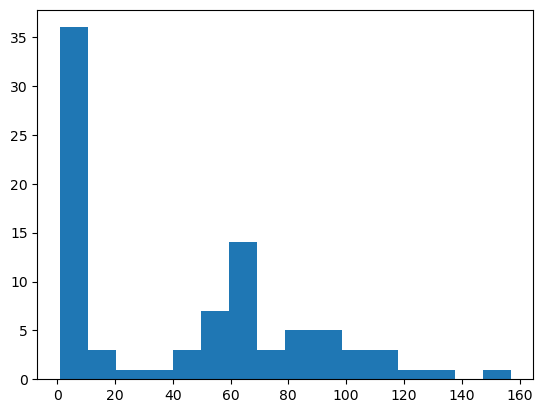

In [27]:
import matplotlib.pyplot as plt
plt.hist(dataLen,bins=16)
plt.show()

In [28]:
## 기준 길이
MAX_LENGTH=max(dataLen)
MAX_LENGTH

157

In [29]:
### [1] 가장 긴 문장 길이 기준
for idx,sent in enumerate(encodingData):
    cur_length=len(sent)
    if cur_length<MAX_LENGTH:
        encodingData[idx]=sent+([0]*(MAX_LENGTH-cur_length))

In [30]:
for _ in encodingData[:]:
    print(len(_),_)

157 [3, 2, 638, 224, 143, 639, 3, 2, 143, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
157 [640, 641, 343, 98, 2, 45, 344, 4, 3, 78, 79, 2, 345, 80, 20, 346, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
157 [3, 7, 26, 225, 

In [31]:
## 기준 길이
MAX_LENGTH=100
MAX_LENGTH

100

In [32]:
### [2] 가장 긴 문장 길이 기준
for idx,sent in enumerate(encodingData):
    cur_length=len(sent)
    if cur_length<MAX_LENGTH:
        encodingData[idx]=sent+([0]*(MAX_LENGTH-cur_length))
    else:
        encodingData[idx]=sent[(cur_length-MAX_LENGTH):]